## Lab Task-1
 Word Vector Analysis on Adventures of Sherlock Holmes


In [2]:
!pip install spacy
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 57.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
with open("/content/Adventures_Holmes (1).txt", "r", encoding="utf-8") as file:
    holmes_doc = file.read()

In [9]:
import spacy

# Load medium model (contains word vectors)
nlp = spacy.load("en_core_web_md")

# Convert the entire document into a spaCy Doc object
doc = nlp(holmes_doc)


In [10]:
para1 = """To Sherlock Holmes she is always THE woman. I have seldom heard him mention her under any other name."""
para2 = """He was, I take it, the most perfect reasoning and observing machine that the world has seen."""

# Convert them to spaCy Doc objects
doc1 = nlp(para1)
doc2 = nlp(para2)


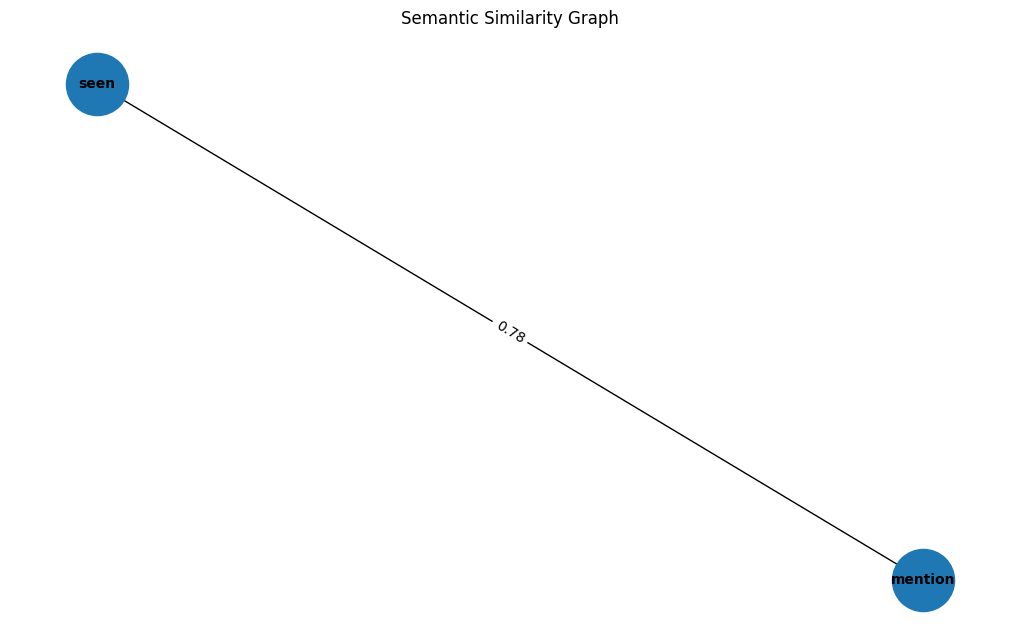

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Create similarity matrix from tokens (using only nouns/verbs for clarity)
tokens1 = [token for token in doc1 if token.has_vector and not token.is_stop and token.pos_ in ["NOUN", "VERB"]]
tokens2 = [token for token in doc2 if token.has_vector and not token.is_stop and token.pos_ in ["NOUN", "VERB"]]

# Create graph
G = nx.Graph()

for token1 in tokens1:
    for token2 in tokens2:
        similarity = token1.similarity(token2)
        if similarity > 0.5:  # threshold to show strong connections
            G.add_edge(token1.text, token2.text, weight=similarity)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})
plt.title("Semantic Similarity Graph")
plt.show()


In [12]:
similarity_score = doc1.similarity(doc2)
print(f"Semantic similarity between Text 1 and Text 2: {similarity_score:.4f}")


Semantic similarity between Text 1 and Text 2: 0.9152


# Lab Task-2
 Further Semantic Analysis on Adventures of Sherlock Holmes

In [17]:
!pip install spacy matplotlib networkx
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 34.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Named entities [['Irene Adler', 'Sherlock Holmes'], ['King of Bohemia', 'Wilhelm Gottsreich Sigismond von Ormstein', 'Cassel-Felstein', 'the King'], ['née Adler', 'Sherlock Holmes', 'Irene Norton']]

=== Similarity Scores (with Key Phrases + Named Entities) ===
Text 1 vs Text 2: 0.6824
Text 1 vs Text 3: 0.7693
Text 2 vs Text 3: 0.7044


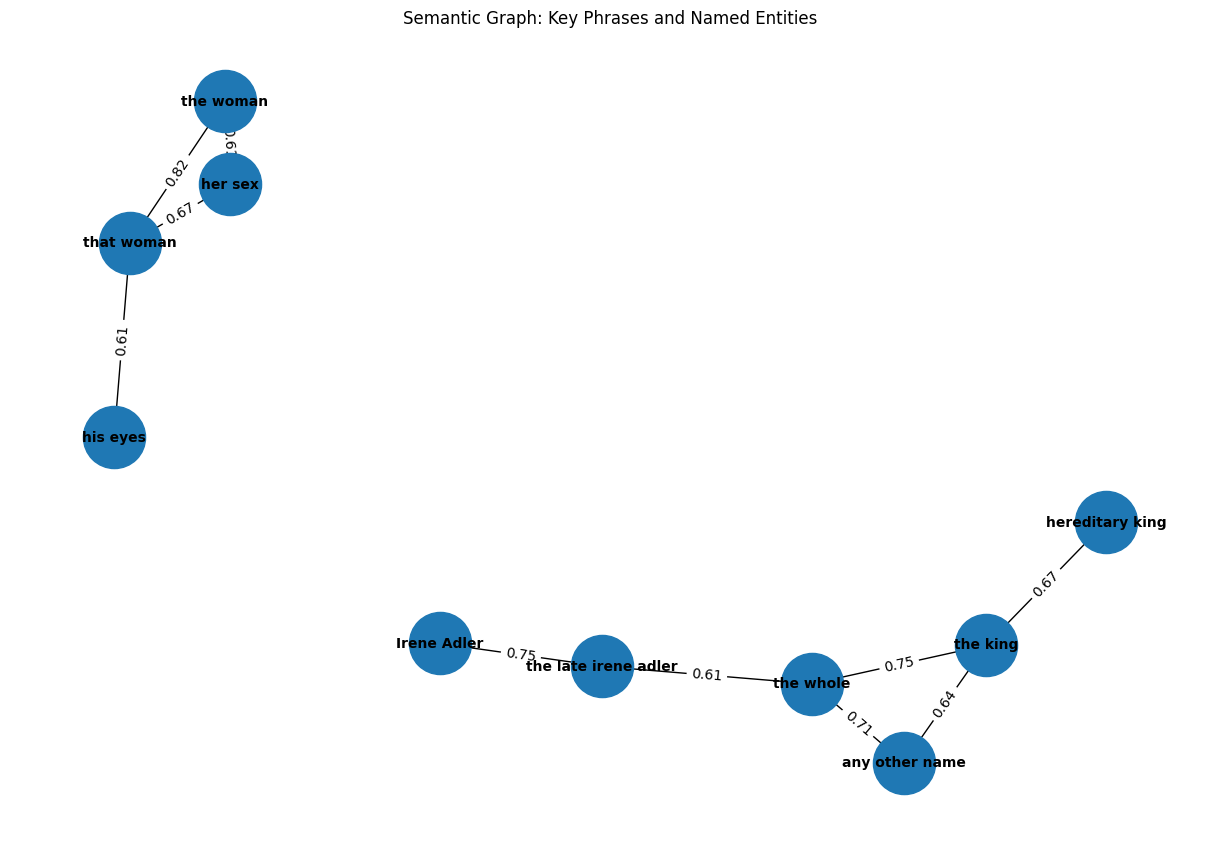

In [19]:
import spacy
import matplotlib.pyplot as plt
import networkx as nx

# Load spaCy medium model
nlp = spacy.load("en_core_web_md")

# Define three representative paragraphs from the novel
text1 = (
    "To Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. "
    "In his eyes she eclipses and predominates the whole of her sex. That woman was the late Irene Adler."
)

text2 = (
    "You are right, he cried; I am the King. Why should I attempt to conceal it? "
    "Wilhelm Gottsreich Sigismond von Ormstein, Grand Duke of Cassel-Felstein, and hereditary King of Bohemia."
)

text3 = (
    "The King may do what he will without hindrance from one whom he has cruelly wronged. "
    "I remain, dear Mr. Sherlock Holmes, Very truly yours, Irene Norton, née Adler."
)

# Convert texts to spaCy documents
doc1, doc2, doc3 = nlp(text1), nlp(text2), nlp(text3)

# Key phrase extraction
def extract_key_phrases(doc):
    return list(set(chunk.text.lower() for chunk in doc.noun_chunks if len(chunk.text.split()) > 1))

# Named entity extraction
def extract_named_entities(doc):
    return list(set(ent.text for ent in doc.ents if ent.label_ in ["PERSON", "GPE", "ORG", "DATE"]))

# Extract and combine
key_phrases = [extract_key_phrases(doc) for doc in (doc1, doc2, doc3)]
named_entities = [extract_named_entities(doc) for doc in (doc1, doc2, doc3)]
print("Named entities", named_entities)
# Create enriched doc for similarity
def build_doc(kp, ne):
    return nlp(" ".join(kp + ne))

enhanced_docs = [build_doc(kp, ne) for kp, ne in zip(key_phrases, named_entities)]

# Similarity scores
print("\n=== Similarity Scores (with Key Phrases + Named Entities) ===")
print(f"Text 1 vs Text 2: {enhanced_docs[0].similarity(enhanced_docs[1]):.4f}")
print(f"Text 1 vs Text 3: {enhanced_docs[0].similarity(enhanced_docs[2]):.4f}")
print(f"Text 2 vs Text 3: {enhanced_docs[1].similarity(enhanced_docs[2]):.4f}")

# Select top 15 unique tokens
tokens = list(set(sum(key_phrases + named_entities, [])))[:15]

# Create similarity graph
G = nx.Graph()
for i in range(len(tokens)):
    for j in range(i + 1, len(tokens)):
        sim = nlp(tokens[i]).similarity(nlp(tokens[j]))
        if sim > 0.6:
            G.add_edge(tokens[i], tokens[j], weight=round(sim, 2))

# Plot graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})
plt.title("Semantic Graph: Key Phrases and Named Entities")
plt.show()


Key phrase extraction and NER significantly enhance semantic analysis by:

Making textual similarity more meaningful and plot-aware.

Highlighting thematic and character relationships.

Providing a visual structure to understand story dynamics.